In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyexcel_ods3 import get_data
import json

In [3]:
def read_ods_as_nested_dict(filename):

    data = get_data(filename)
    sheet_data = data['Sheet1']
    
    # FIXED: Strip spaces from headers
    headers = [header.strip() if isinstance(header, str) else header 
               for header in sheet_data[0][1:]]  # Skip first empty header
    
    result = {}
    current_operation = None
    
    for row in sheet_data[1:]:
        if not row or all(x is None or x == '' for x in row):
            continue
            
        if row[0] is not None and row[0] != '':
            current_operation = row[0]
        
        if current_operation not in result:
            result[current_operation] = {}
        
        # Get vector length and block size
        vector_length = row[1] if len(row) > 1 else None
        block_size = row[2] if len(row) > 2 else None
        
        if vector_length not in result[current_operation]:
            result[current_operation][vector_length] = {}
        
        # Store all metrics for this combination
        metrics = {}
        for i, header in enumerate(headers[2:], 3):  # Skip vector_length and block_size
            if i < len(row):
                # FIXED: Use stripped header as key
                metrics[header] = row[i]
        
        result[current_operation][vector_length][block_size] = metrics
    
    return result

In [4]:
agner_pmc_haswell = read_ods_as_nested_dict('agner_measurement_table_haswell_Vec8f.ods')
agner_pmc_skylake = read_ods_as_nested_dict('agner_measurement_table_skylake_Vec8f.ods')
agner_pmc_meteorlake = read_ods_as_nested_dict('agner_measurement_table_meteorlake_Vec8f.ods')

In [5]:
agner_pmc_haswell.keys()

dict_keys(['permute', 'depermute', 'fir cores', 'part sol', 'homo sol', 'cr forward', 'cr backward', 'iir ph', 'iir cr', 'block filtering', 'scalar', 'filter ph 2', 'filter ph 4', 'filter ph 8', 'filter ph 16', 'filter cr 2', 'filter cr 4', 'filter cr 8', 'filter cr 16', 'filter bf 2', 'filter bf 4', 'filter bf 8', 'filter bf 16', 'filter sc 2', 'filter sc 4', 'filter sc 8', 'filter sc 16'])

In [6]:
agner_pmc_haswell['permute'][8][8]
agner_pmc_haswell['permute'][4][16]

{'data size': 64,
 'cyc': 42,
 'inst': 82,
 'uops': 99,
 'rs': 0,
 'rs std': 0,
 'cm': 0,
 'cm std': 0,
 'cdm': 0,
 'cdm std': 0,
 'cps': 0.65625,
 'ips': 1.28125,
 'ipc': 1.9523809523809523,
 'rss': 0}

In [7]:
f_sc16_pmc_haswell = agner_pmc_haswell['filter sc 16'][8]

f_sc16_cps_haswell = f_sc16_pmc_haswell[1]['cps']
f_sc16_time_haswell = f_sc16_pmc_haswell[1]['real time']

In [8]:
f_bf16_pmc_haswell = agner_pmc_haswell['filter bf 16'][8]

f_bf16_cps_haswell = f_bf16_pmc_haswell[1]['cps']
f_bf16_time_haswell = f_bf16_pmc_haswell[1]['real time']

In [9]:
f_ph16_pmc_haswell = agner_pmc_haswell['filter ph 16'][8]

f_ph16_cps_haswell = np.array([metrics['cps'] for metrics in f_ph16_pmc_haswell.values()])

f_ph16_cps_haswell_first =  f_ph16_cps_haswell[0]

f_ph16_cps_haswell_x = np.argmin(f_ph16_cps_haswell)
f_ph16_cps_haswell = f_ph16_cps_haswell[f_ph16_cps_haswell_x]

f_ph16_time_haswell = np.array([metrics['real time'] for metrics in f_ph16_pmc_haswell.values()])

f_ph16_time_haswell_first =  f_ph16_time_haswell[0]

f_ph16_time_haswell_x = np.argmin(f_ph16_time_haswell)
f_ph16_time_haswell = f_ph16_time_haswell[f_ph16_time_haswell_x]

In [10]:
f_cr16_pmc_haswell = agner_pmc_haswell['filter cr 16'][8]

f_cr16_cps_haswell = np.array([metrics['cps'] for metrics in f_cr16_pmc_haswell.values()])

f_cr16_cps_haswell_first =  f_cr16_cps_haswell[0]

f_cr16_cps_haswell_x = np.argmin(f_cr16_cps_haswell)
f_cr16_cps_haswell = f_cr16_cps_haswell[f_cr16_cps_haswell_x]

f_cr16_time_haswell = np.array([metrics['real time'] for metrics in f_cr16_pmc_haswell.values()])

f_cr16_time_haswell_first =  f_cr16_time_haswell[0]

f_cr16_time_haswell_x = np.argmin(f_cr16_time_haswell)
f_cr16_time_haswell = f_cr16_time_haswell[f_cr16_time_haswell_x]

In [11]:
f_sc16_pmc_skylake = agner_pmc_skylake['filter sc 16'][8]

f_sc16_cps_skylake = f_sc16_pmc_skylake[1]['cps']
f_sc16_time_skylake = f_sc16_pmc_skylake[1]['real time']

In [12]:
f_bf16_pmc_skylake = agner_pmc_skylake['filter bf 16'][8]

f_bf16_cps_skylake = f_bf16_pmc_skylake[1]['cps']
f_bf16_time_skylake = f_bf16_pmc_skylake[1]['real time']

In [13]:
f_ph16_pmc_skylake = agner_pmc_skylake['filter ph 16'][8]

f_ph16_cps_skylake = np.array([metrics['cps'] for metrics in f_ph16_pmc_skylake.values()])

f_ph16_cps_skylake_first =  f_ph16_cps_skylake[0]

f_ph16_cps_skylake_x = np.argmin(f_ph16_cps_skylake)
f_ph16_cps_skylake = f_ph16_cps_skylake[f_ph16_cps_skylake_x]

f_ph16_time_skylake = np.array([metrics['real time'] for metrics in f_ph16_pmc_skylake.values()])

f_ph16_time_skylake_first =  f_ph16_time_skylake[0]

f_ph16_time_skylake_x = np.argmin(f_ph16_time_skylake)
f_ph16_time_skylake = f_ph16_time_skylake[f_ph16_time_skylake_x]

In [14]:
f_cr16_pmc_skylake = agner_pmc_skylake['filter cr 16'][8]

f_cr16_cps_skylake = np.array([metrics['cps'] for metrics in f_cr16_pmc_skylake.values()])

f_cr16_cps_skylake_first =  f_cr16_cps_skylake[0]

f_cr16_cps_skylake_x = np.argmin(f_cr16_cps_skylake)
f_cr16_cps_skylake = f_cr16_cps_skylake[f_cr16_cps_skylake_x]

f_cr16_time_skylake = np.array([metrics['real time'] for metrics in f_cr16_pmc_skylake.values()])

f_cr16_time_skylake_first =  f_cr16_time_skylake[0]

f_cr16_time_skylake_x = np.argmin(f_cr16_time_skylake)
f_cr16_time_skylake = f_cr16_time_skylake[f_cr16_time_skylake_x]

In [15]:
f_sc16_pmc_meteorlake = agner_pmc_meteorlake['filter sc 16'][8]

f_sc16_cps_meteorlake = f_sc16_pmc_meteorlake[1]['cps']
f_sc16_time_meteorlake = f_sc16_pmc_meteorlake[1]['real time']

In [16]:
f_bf16_pmc_meteorlake = agner_pmc_meteorlake['filter bf 16'][8]

f_bf16_cps_meteorlake = f_bf16_pmc_meteorlake[1]['cps']
f_bf16_time_meteorlake = f_bf16_pmc_meteorlake[1]['real time']

In [17]:
f_ph16_pmc_meteorlake = agner_pmc_meteorlake['filter ph 16'][8]

f_ph16_cps_meteorlake = np.array([metrics['cps'] for metrics in f_ph16_pmc_meteorlake.values()])

f_ph16_cps_meteorlake_first =  f_ph16_cps_meteorlake[0]

f_ph16_cps_meteorlake_x = np.argmin(f_ph16_cps_meteorlake)
f_ph16_cps_meteorlake = f_ph16_cps_meteorlake[f_ph16_cps_meteorlake_x]

f_ph16_time_meteorlake = np.array([metrics['real time'] for metrics in f_ph16_pmc_meteorlake.values()])

f_ph16_time_meteorlake_first =  f_ph16_time_meteorlake[0]

f_ph16_time_meteorlake_x = np.argmin(f_ph16_time_meteorlake)
f_ph16_time_meteorlake = f_ph16_time_meteorlake[f_ph16_time_meteorlake_x]

In [18]:
f_cr16_pmc_meteorlake = agner_pmc_meteorlake['filter cr 16'][8]

f_cr16_cps_meteorlake = np.array([metrics['cps'] for metrics in f_cr16_pmc_meteorlake.values()])

f_cr16_cps_meteorlake_first =  f_cr16_cps_meteorlake[0]

f_cr16_cps_meteorlake_x = np.argmin(f_cr16_cps_meteorlake)
f_cr16_cps_meteorlake = f_cr16_cps_meteorlake[f_cr16_cps_meteorlake_x]

f_cr16_time_meteorlake = np.array([metrics['real time'] for metrics in f_cr16_pmc_meteorlake.values()])

f_cr16_time_meteorlake_first =  f_cr16_time_meteorlake[0]

f_cr16_time_meteorlake_x = np.argmin(f_cr16_time_meteorlake)
f_cr16_time_meteorlake = f_cr16_time_meteorlake[f_cr16_time_meteorlake_x]

In [19]:
cps_best_sc = np.array([f_sc16_cps_haswell,f_sc16_cps_skylake,f_sc16_cps_meteorlake])

cps_best_bf = np.array([f_bf16_cps_haswell,f_bf16_cps_skylake,f_bf16_cps_meteorlake])

cps_best_ph = np.array([f_ph16_cps_haswell,f_ph16_cps_skylake,f_ph16_cps_meteorlake])

cps_best_cr = np.array([f_cr16_cps_haswell,f_cr16_cps_skylake,f_cr16_cps_meteorlake])

In [20]:
time_best_sc = np.array([f_sc16_time_haswell,f_sc16_time_skylake,f_sc16_time_meteorlake])

time_best_bf = np.array([f_bf16_time_haswell,f_bf16_time_skylake,f_bf16_time_meteorlake])

time_best_ph = np.array([f_ph16_time_haswell,f_ph16_time_skylake,f_ph16_time_meteorlake])

time_best_cr = np.array([f_cr16_time_haswell,f_cr16_time_skylake,f_cr16_time_meteorlake])

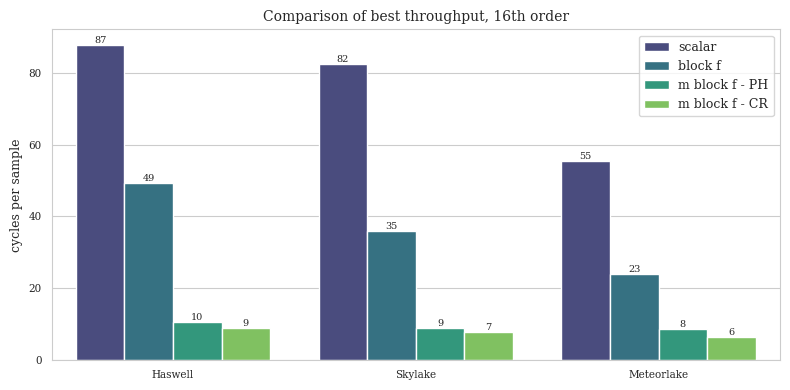

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set seaborn style and font properties (extracted from your code)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 7.5,
    'ytick.labelsize': 7.5,
    'legend.fontsize': 9
})

# Create sample data - three numpy arrays with the same length
array1 = cps_best_sc
array2 = cps_best_bf
array3 = cps_best_ph
array4 = cps_best_cr

# Create x-axis labels
x_labels = ['Haswell', 'Skylake', 'Meteorlake']

# Method 1: Using seaborn with melted DataFrame (Recommended)
# print("Method 1: Grouped Bar Plot using Seaborn - Enhanced Styling")

# Create a DataFrame from the numpy arrays
df = pd.DataFrame({
    'Categories': x_labels,
    'scalar': array1,
    'block f': array2,
    'm block f - PH': array3,
    'm block f - CR': array4
})

# Melt the DataFrame to long format (required for seaborn)
df_melted = df.melt(id_vars='Categories', 
                    value_vars=['scalar', 'block f', 'm block f - PH', 'm block f - CR'],
                    var_name='Array', 
                    value_name='Values')

# Create the grouped bar plot with professional styling
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_melted, x='Categories', y='Values', hue='Array', 
           palette='viridis', ax=ax)

# Customize the plot with styling from your code
ax.set_xlabel('')
ax.set_ylabel('cycles per sample')
ax.set_title('Comparison of best throughput, 16th order')

# Enhanced legend styling (from your code)
legend = ax.legend(title='', framealpha=0.9)
legend.get_frame().set_alpha(0.8)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add value labels on top of bars (optional)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=7)

plt.tight_layout()
plt.show()



In [22]:
cps_fast_sc = np.array([f_sc16_cps_haswell,f_sc16_cps_skylake,f_sc16_cps_meteorlake])

cps_fast_bf = np.array([f_bf16_cps_haswell,f_bf16_cps_skylake,f_bf16_cps_meteorlake])

cps_fast_ph = np.array([f_ph16_cps_haswell_first,f_ph16_cps_skylake_first,f_ph16_cps_meteorlake_first])

cps_fast_cr = np.array([f_cr16_cps_haswell_first,f_cr16_cps_skylake_first,f_cr16_cps_meteorlake_first])

In [23]:
time_fast_sc = np.array([f_sc16_time_haswell,f_sc16_time_skylake,f_sc16_time_meteorlake])

time_fast_bf = np.array([f_bf16_time_haswell,f_bf16_time_skylake,f_bf16_time_meteorlake])

time_fast_ph = np.array([f_ph16_time_haswell_first,f_ph16_time_skylake_first,f_ph16_time_meteorlake_first])

time_fast_cr = np.array([f_cr16_time_haswell_first,f_cr16_time_skylake_first,f_cr16_time_meteorlake_first])

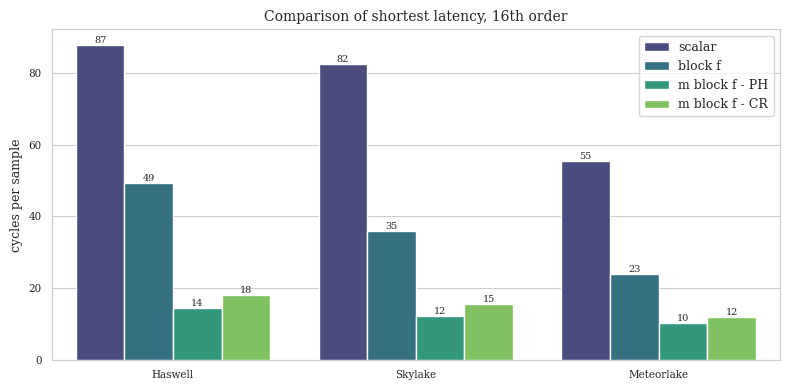

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set seaborn style and font properties (extracted from your code)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 7.5,
    'ytick.labelsize': 7.5,
    'legend.fontsize': 9
})

# Create sample data - three numpy arrays with the same length
array1 = cps_fast_sc
array2 = cps_fast_bf
array3 = cps_fast_ph
array4 = cps_fast_cr

# Create x-axis labels
x_labels = ['Haswell', 'Skylake', 'Meteorlake']

# Method 1: Using seaborn with melted DataFrame (Recommended)
# print("Method 1: Grouped Bar Plot using Seaborn - Enhanced Styling")

# Create a DataFrame from the numpy arrays
df = pd.DataFrame({
    'Categories': x_labels,
    'scalar': array1,
    'block f': array2,
    'm block f - PH': array3,
    'm block f - CR': array4
})

# Melt the DataFrame to long format (required for seaborn)
df_melted = df.melt(id_vars='Categories', 
                    value_vars=['scalar', 'block f', 'm block f - PH', 'm block f - CR'],
                    var_name='Array', 
                    value_name='Values')

# Create the grouped bar plot with professional styling
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_melted, x='Categories', y='Values', hue='Array', 
           palette='viridis', ax=ax)

# Customize the plot with styling from your code
ax.set_xlabel('')
ax.set_ylabel('cycles per sample')
ax.set_title('Comparison of shortest latency, 16th order')

# Enhanced legend styling (from your code)
legend = ax.legend(title='', framealpha=0.9)
legend.get_frame().set_alpha(0.8)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Add value labels on top of bars (optional)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=7)

plt.tight_layout()
plt.show()



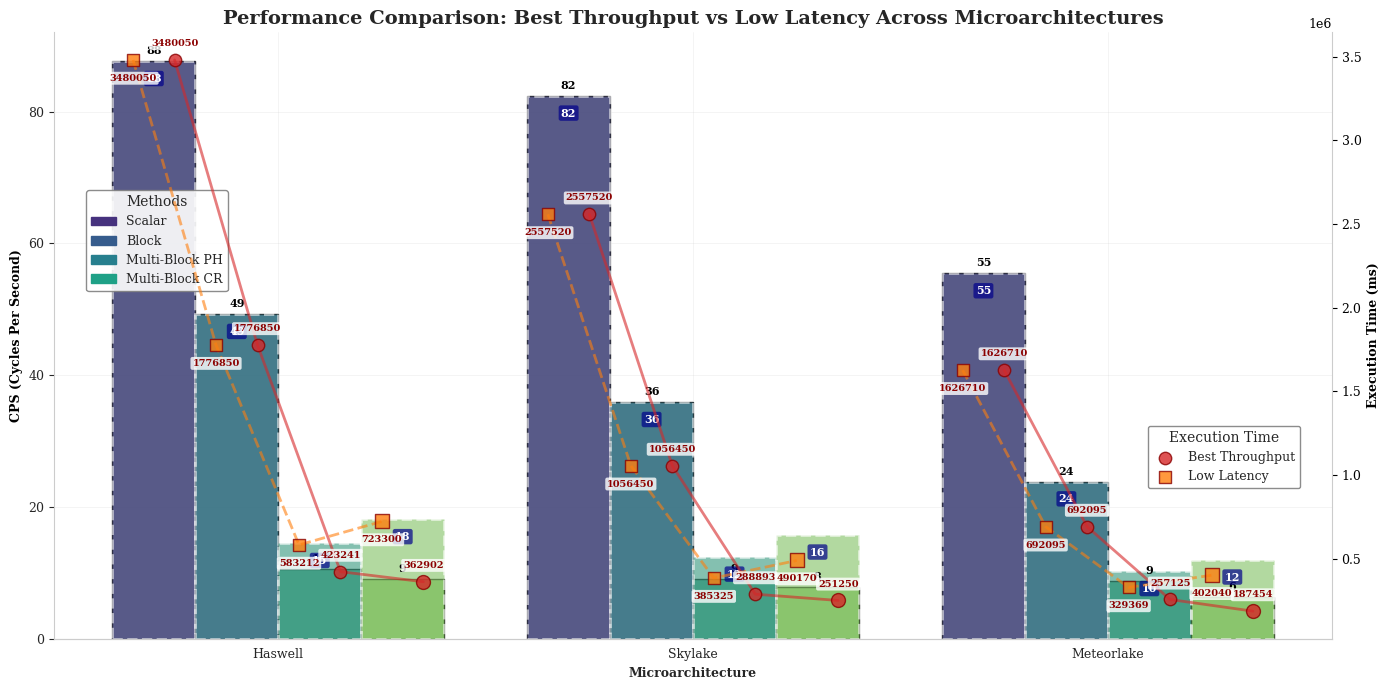

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set seaborn style and font properties
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})

# Get default seaborn palette colors
default_palette = sns.color_palette()
red = default_palette[3]

# Sample data for demonstration (replace with your actual arrays)
# Best Throughput data
# cps_best_sc = np.array([1500, 1800, 2100])   # Best Scalar CPS [Haswell, Skylake, Meteorlake]
# cps_best_bf = np.array([2200, 2600, 3000])   # Best Block CPS
# cps_best_ph = np.array([2400, 2800, 3200])   # Best Multi-Block PH CPS
# cps_best_cr = np.array([2500, 2900, 3300])   # Best Multi-Block CR CPS

# time_best_sc = np.array([35, 30, 25])        # Best Scalar Time
# time_best_bf = np.array([22, 18, 15])        # Best Block Time
# time_best_ph = np.array([20, 16, 13])        # Best Multi-Block PH Time
# time_best_cr = np.array([18, 14, 11])        # Best Multi-Block CR Time

# # Low Latency (Fast) data
# cps_fast_sc = np.array([1200, 1500, 1800])   # Fast Scalar CPS
# cps_fast_bf = np.array([1800, 2200, 2600])   # Fast Block CPS
# cps_fast_ph = np.array([2000, 2400, 2800])   # Fast Multi-Block PH CPS
# cps_fast_cr = np.array([2100, 2500, 2900])   # Fast Multi-Block CR CPS

# time_fast_sc = np.array([45, 38, 32])        # Fast Scalar Time
# time_fast_bf = np.array([30, 25, 22])        # Fast Block Time
# time_fast_ph = np.array([28, 23, 20])        # Fast Multi-Block PH Time
# time_fast_cr = np.array([26, 21, 18])        # Fast Multi-Block CR Time

# Create x-axis labels
x_labels = ['Haswell', 'Skylake', 'Meteorlake']
method_labels = ['Scalar', 'Block', 'Multi-Block PH', 'Multi-Block CR']
n_categories = len(x_labels)

# Create comprehensive DataFrame for plotting
data_rows = []
for i, arch in enumerate(x_labels):
    for j, method in enumerate(method_labels):
        # Best throughput data
        if method == 'Scalar':
            best_cps, fast_cps = cps_best_sc[i], cps_fast_sc[i]
            best_time, fast_time = time_best_sc[i], time_fast_sc[i]
        elif method == 'Block':
            best_cps, fast_cps = cps_best_bf[i], cps_fast_bf[i]
            best_time, fast_time = time_best_bf[i], time_fast_bf[i]
        elif method == 'Multi-Block PH':
            best_cps, fast_cps = cps_best_ph[i], cps_fast_ph[i]
            best_time, fast_time = time_best_ph[i], time_fast_ph[i]
        else:  # Multi-Block CR
            best_cps, fast_cps = cps_best_cr[i], cps_fast_cr[i]
            best_time, fast_time = time_best_cr[i], time_fast_cr[i]
        
        data_rows.append({
            'Architecture': arch,
            'Method': method,
            'Optimization': 'Best Throughput',
            'CPS': best_cps,
            'Time': best_time
        })
        data_rows.append({
            'Architecture': arch,
            'Method': method,
            'Optimization': 'Low Latency',
            'CPS': fast_cps,
            'Time': fast_time
        })

df = pd.DataFrame(data_rows)

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create overlapping bars for Best Throughput (background) and Low Latency (foreground)
# First, plot Best Throughput bars (taller, behind)
df_best = df[df['Optimization'] == 'Best Throughput']
sns.barplot(data=df_best, x='Architecture', y='CPS', hue='Method', 
           palette='viridis', ax=ax1, alpha=0.8, 
           edgecolor='black', linewidth=1)

# Then, plot Low Latency bars (shorter, in front) on the same positions
df_fast = df[df['Optimization'] == 'Low Latency']
sns.barplot(data=df_fast, x='Architecture', y='CPS', hue='Method', 
           palette='viridis', ax=ax1, alpha=0.6, 
           edgecolor='white', linewidth=2, linestyle='--')

# Customize the primary axis
ax1.set_xlabel('Microarchitecture', fontweight='bold')
ax1.set_ylabel('CPS (Cycles Per Second)', color='black', fontweight='bold')
ax1.set_title('Performance Comparison: Best Throughput vs Low Latency Across Microarchitectures', 
              fontsize=14, fontweight='bold')

# Create secondary y-axis
ax2 = ax1.twinx()

# Get the actual bar positions from the seaborn barplot (use the last 4 containers for Low Latency)
bar_positions = []
# Use the Low Latency bars (last 4 containers) for positioning since they're on top
for container in ax1.containers[-4:]:
    positions = [bar.get_x() + bar.get_width()/2 for bar in container]
    bar_positions.append(positions)

# Extract x positions for each of the four method groups
x_pos_methods = [np.array(pos) for pos in bar_positions]

# Define line colors and styles for scatter plots
markers = ['o', 'd', 's', '*']
marker_sizes = [80, 80, 80, 100]

# Prepare time data arrays for each method
time_data = {
    'Best Throughput': [time_best_sc, time_best_bf, time_best_ph, time_best_cr],
    'Low Latency': [time_fast_sc, time_fast_bf, time_fast_ph, time_fast_cr]
}

# Plot scatter points for each optimization type
optimization_colors = {'Best Throughput': '#d62728', 'Low Latency': '#ff7f0e'}
optimization_markers = {'Best Throughput': 'o', 'Low Latency': 's'}

for opt_idx, optimization in enumerate(['Best Throughput', 'Low Latency']):
    for method_idx, method in enumerate(method_labels):
        time_array = time_data[optimization][method_idx]
        x_positions = x_pos_methods[method_idx]
        
        # Offset positions slightly for Best vs Low Latency to avoid overlap
        x_offset = x_positions + (0.05 if optimization == 'Best Throughput' else -0.05)
        
        ax2.scatter(x_offset, time_array, 
                   color=optimization_colors[optimization], 
                   marker=optimization_markers[optimization], 
                   s=marker_sizes[method_idx], 
                   label=f'{optimization}' if method_idx == 0 else "", 
                   zorder=5, edgecolor='darkred', linewidth=1, alpha=0.8)

# Connect points within each architecture group for both optimizations
for i in range(n_categories):
    for optimization in ['Best Throughput', 'Low Latency']:
        # Get x positions and y values for this architecture and optimization
        x_positions = []
        y_values = []
        
        for method_idx in range(len(method_labels)):
            x_offset = x_pos_methods[method_idx][i] + (0.05 if optimization == 'Best Throughput' else -0.05)
            x_positions.append(x_offset)
            y_values.append(time_data[optimization][method_idx][i])
        
        # Plot line connecting the four points within this architecture
        line_color = optimization_colors[optimization]
        line_style = '-' if optimization == 'Best Throughput' else '--'
        ax2.plot(x_positions, y_values, color=line_color, linewidth=2, 
                alpha=0.6, zorder=3, linestyle=line_style)

# Customize secondary axis
ax2.set_ylabel('Execution Time (ms)', color='black', fontweight='bold')
ax2.tick_params(axis='y', colors='black')

# Customize grid
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.grid(False)

# Add value labels on overlapping bars
for method_idx, method in enumerate(method_labels):
    x_positions = x_pos_methods[method_idx]
    
    # Get CPS data for this method
    best_cps = df_best[df_best['Method'] == method]['CPS'].values
    fast_cps = df_fast[df_fast['Method'] == method]['CPS'].values
    
    for i, (best_val, fast_val) in enumerate(zip(best_cps, fast_cps)):
        # Label for best throughput (higher bar, on top)
        ax1.annotate(f'{best_val:.0f}', (x_positions[i], best_val), 
                    textcoords="offset points", xytext=(0,5), ha='center', 
                    fontsize=8, color='black', fontweight='bold')
        # Label for low latency (lower bar, positioned lower)
        ax1.annotate(f'{fast_val:.0f}', (x_positions[i], fast_val), 
                    textcoords="offset points", xytext=(0,-15), ha='center', 
                    fontsize=8, color='white', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", 
                            facecolor='darkblue', edgecolor='none', alpha=0.7))

# Add value labels for time scatter plots with white background boxes
for opt_idx, optimization in enumerate(['Best Throughput', 'Low Latency']):
    for method_idx, method in enumerate(method_labels):
        time_array = time_data[optimization][method_idx]
        x_positions = x_pos_methods[method_idx]
        x_offset = x_positions + (0.05 if optimization == 'Best Throughput' else -0.05)
        
        for i, time_val in enumerate(time_array):
            y_offset = 10 if optimization == 'Best Throughput' else -15
            ax2.annotate(f'{time_val:.0f}', (x_offset[i], time_val), 
                        textcoords="offset points", xytext=(0, y_offset), 
                        ha='center', fontsize=7, color='darkred', 
                        fontweight='bold', 
                        bbox=dict(boxstyle="round,pad=0.2", 
                                facecolor='white', edgecolor='none', alpha=0.8))

# Create custom legends
# Legend for optimization types (overlapping bars)
optimization_legend_elements = [
    mpatches.Patch(color='gray', alpha=0.8, label='Best Throughput'),
    mpatches.Patch(color='gray', alpha=0.6, label='Low Latency')
]
optimization_legend = ax1.legend(handles=optimization_legend_elements, title='CPS Performance', 
                                loc='upper left', framealpha=0.9, bbox_to_anchor=(0.02, 0.98),
                                title_fontsize=10, fontsize=9)

# Legend for method colors
method_legend_elements = [
    mpatches.Patch(color=sns.color_palette('viridis')[i], label=method) 
    for i, method in enumerate(method_labels)
]
method_legend = ax1.legend(handles=method_legend_elements, title='Methods', 
                          loc='upper left', framealpha=0.9, bbox_to_anchor=(0.02, 0.75),
                          title_fontsize=10, fontsize=9)

# Style the legends
for legend in [optimization_legend, method_legend]:
    legend.get_frame().set_alpha(0.9)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('gray')

# Create legend for time scatter plots
line_legend = ax2.legend(title='Execution Time', loc='center right', 
                        framealpha=0.9, bbox_to_anchor=(0.98, 0.3),
                        title_fontsize=10, fontsize=9)
line_legend.get_frame().set_alpha(0.9)
line_legend.get_frame().set_facecolor('white')
line_legend.get_frame().set_edgecolor('gray')

# Improve overall layout
plt.tight_layout()

# Add subtle styling improvements
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Show the plot

plt.savefig('final.png', bbox_inches='tight', dpi=300, facecolor='white', edgecolor='none')

plt.show()